In [3]:
import pandas as pd

# 1. Carga del archivo de Ventas
try:
    df_sales = pd.read_csv("../data/SalesFINAL12312016_clean.csv")
    print("✅ Archivo Sales cargado con éxito.")
except FileNotFoundError:
    print("❌ Error: No encuentro el archivo. Chequeá el nombre exacto.")

# 2. EL DATO DE ORO: Total Facturado (La plata que entró)
# Verificamos el nombre de la columna (suele ser SalesDollars)
col_dolares = 'SalesDollars' if 'SalesDollars' in df_sales.columns else 'Sales'

total_ventas = df_sales[col_dolares].sum()
print(f"\n💰 TOTAL FACTURADO EN EL AÑO: ${total_ventas:,.2f}")

# 3. ¿La Sucursal 50 (la del problema) vende mucho o poco?
ventas_sucursal_50 = df_sales[df_sales['Store'] == 50][col_dolares].sum()
print(f"🏪 Ventas de la Sucursal 50: ${ventas_sucursal_50:,.2f}")

# 4. Top 3 Sucursales que más venden (Para comparar)
top_stores = df_sales.groupby('Store')[col_dolares].sum().sort_values(ascending=False).head(3)
print("\n--- Top 3 Sucursales Estrellas ---")
print(top_stores)

❌ Error: No encuentro el archivo. Chequeá el nombre exacto.


NameError: name 'df_sales' is not defined

In [4]:
# Esto te va a imprimir la lista exacta de las columnas de tu archivo
print(df_sales.columns.tolist())


NameError: name 'df_sales' is not defined

In [5]:
import os
print(os.listdir("../data/"))


FileNotFoundError: [WinError 3] El sistema no puede encontrar la ruta especificada: '../data/'

In [6]:
import pandas as pd


ruta_absoluta = r"D:\Usuario\Escritorio\HENRY 2025\PF\repositorio PF-facosta73\PI-Final-Henry-G2\data\SalesFINAL12312016_clean.csv"

# 1. Cargamos el archivo
df_sales = pd.read_csv(ruta_absoluta)
print("✅ ¡BINGO! Archivo cargado perfectamente.")

# 2. Leemos las columnas para ver cómo se llama la de "Plata"
print("\n--- Las columnas disponibles son: ---")
print(df_sales.columns.tolist())

✅ ¡BINGO! Archivo cargado perfectamente.

--- Las columnas disponibles son: ---
['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'SalesQuantity', 'SalesDollars', 'SalesPrice', 'SalesDate', 'Volume', 'Classification', 'ExciseTax', 'VendorNo', 'VendorName']


In [7]:
# 1. EL DATO DE ORO: Total Facturado (La plata que entró)
total_ventas = df_sales['SalesDollars'].sum()
print(f"💰 TOTAL FACTURADO EN EL AÑO (Ventas reales): ${total_ventas:,.2f}")

# 2. ¿La Sucursal 50 (nuestro agujero negro) vende mucho o poco?
ventas_sucursal_50 = df_sales[df_sales['Store'] == 50]['SalesDollars'].sum()
print(f"🏪 Ventas totales de la Sucursal 50: ${ventas_sucursal_50:,.2f}")

# 3. Top 3 Sucursales que más venden (Para comparar con la 50)
top_stores = df_sales.groupby('Store')['SalesDollars'].sum().sort_values(ascending=False).head(3)
print("\n--- Top 3 Sucursales Estrellas (Las que más venden) ---")
print(top_stores)

💰 TOTAL FACTURADO EN EL AÑO (Ventas reales): $33,139,375.29
🏪 Ventas totales de la Sucursal 50: $908,139.77

--- Top 3 Sucursales Estrellas (Las que más venden) ---
Store
34    1537806.51
15    1422998.94
76    1402698.59
Name: SalesDollars, dtype: float64


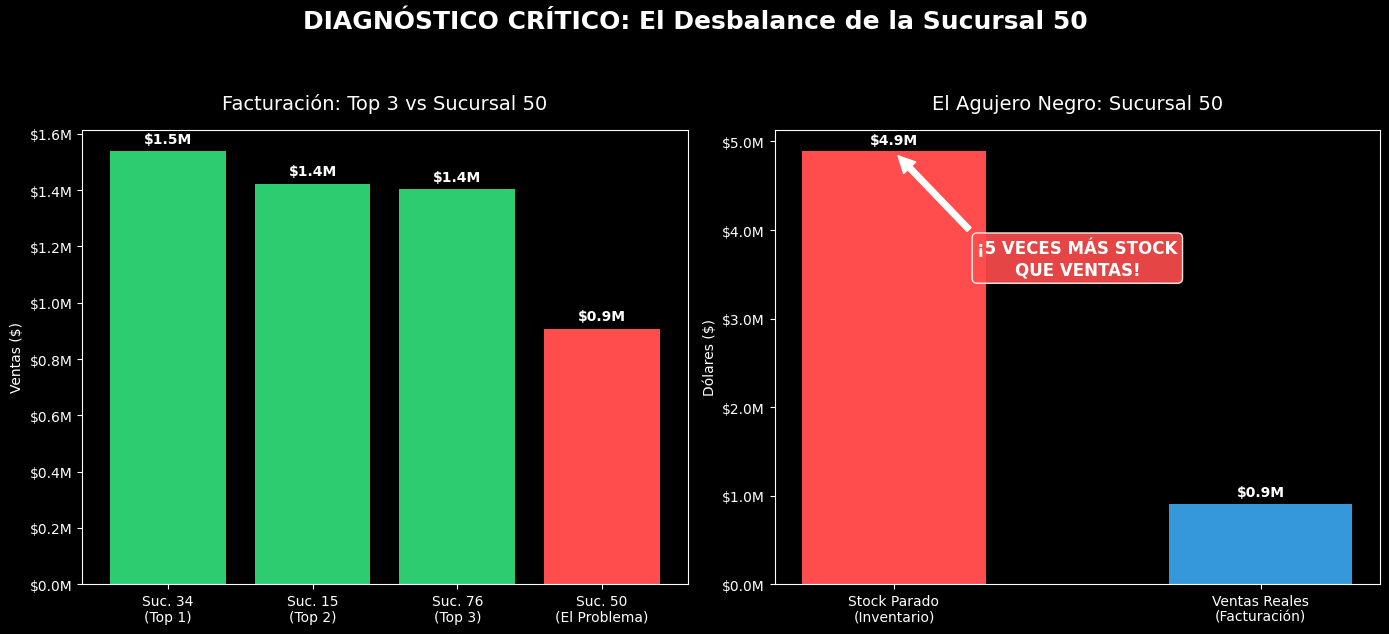

In [8]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Configuración estilo profesional oscuro
plt.style.use('dark_background')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# --- GRÁFICO 1: Ventas (Top 3 vs Sucursal 50) ---
stores = ['Suc. 34\n(Top 1)', 'Suc. 15\n(Top 2)', 'Suc. 76\n(Top 3)', 'Suc. 50\n(El Problema)']
sales = [1537806, 1422998, 1402698, 908139]
colors1 = ['#2ecc71', '#2ecc71', '#2ecc71', '#ff4d4d'] # Verde esperanza, rojo alerta

bars1 = ax1.bar(stores, sales, color=colors1)
ax1.set_title('Facturación: Top 3 vs Sucursal 50', fontsize=14, color='white', pad=15)
ax1.set_ylabel('Ventas ($)')

for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 20000, f'${yval/1e6:.1f}M', ha='center', va='bottom', color='white', fontweight='bold')

# --- GRÁFICO 2: Sucursal 50 (Stock vs Ventas) ---
categories = ['Stock Parado\n(Inventario)', 'Ventas Reales\n(Facturación)']
values = [4887260, 908139] # $4.8M inmovilizado vs $0.9M vendidos
colors2 = ['#ff4d4d', '#3498db']

bars2 = ax2.bar(categories, values, color=colors2, width=0.5)
ax2.set_title('El Agujero Negro: Sucursal 50', fontsize=14, color='white', pad=15)
ax2.set_ylabel('Dólares ($)')

for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, yval + 50000, f'${yval/1e6:.1f}M', ha='center', va='bottom', color='white', fontweight='bold')

# Anotación letal
ax2.annotate('¡5 VECES MÁS STOCK\nQUE VENTAS!', xy=(0, 4887260), xytext=(0.5, 3500000),
             arrowprops=dict(facecolor='white', shrink=0.05),
             fontsize=12, color='white', fontweight='bold', ha='center',
             bbox=dict(boxstyle="round,pad=0.3", fc="#ff4d4d", ec="white", alpha=0.9))

# Formatear ejes a Millones
formatter = FuncFormatter(lambda x, p: f'${x/1e6:.1f}M')
ax1.yaxis.set_major_formatter(formatter)
ax2.yaxis.set_major_formatter(formatter)

plt.suptitle('DIAGNÓSTICO CRÍTICO: El Desbalance de la Sucursal 50', fontsize=18, fontweight='bold', color='white', y=1.05)
plt.tight_layout()
plt.show()